In [10]:
# Input file  
incode= """
l i1 1.0 0.0 0.0 n0
mod eo1 9e6 0.18 1 pm 0.0 n0 n1
s s1 1.0 n1 n4
m ITMX 0.9894 0.0106 0.0 n4 n5
s lp 5.560176388908762 n5 n6
m ETMX 0.999 0.001 90.0 n6 n7


pd P_Trans n4 
xaxis ETMX phi lin -180 180 1000
yaxis abs
"""
import pykat
import matplotlib.pyplot as plt
import numpy as np 
import emcee
import corner
from numpy.random import randn, rand, uniform
import matplotlib.gridspec as gridspec
from timeit import default_timer as timer
HH=12
WW=15
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'axes.grid': True})
plt.rcParams['figure.figsize'] = [HH,WW]

Baseob = pykat.finesse.kat()
Baseob.verbose = False
Baseob.parse(incode)

%matplotlib inline
# %matplotlib notebook

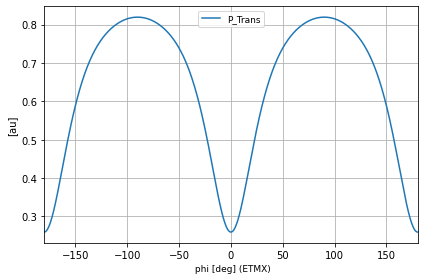

In [20]:
R1=0.2
R2=0.6
ob=Baseob.deepcopy()
ob.ITMX.R=R1
ob.ITMX.T=1-R1
ob.ETMX.R=R2
ob.ETMX.T=1-R2
# ob.lp.L=1
# ob.eo1.f=10e6
res=ob.run()
data=res['P_Trans']
# fig = plt.figure(figsize=(11, 18))
fig=res.plot(detectors = ['P_Trans'])
# fig.show(figsize=(11, 18))

In [32]:
def signalFunction(theta):
    r1,r2=theta
    ob=Baseob.deepcopy()
    ob.ITMX.R=r1
    ob.ITMX.T=1-r1
    ob.ETMX.R=r2
    ob.ETMX.T=1-r2
#     ob.lp.L=l
#     ob.eo1.f=Df
    try:
        res=ob.run()
        return res['P_Trans']
    except:
        print("An exception occurred")
        print([r1,r2])
#         print([r1 ,1-r1-d1,r2,1-r2-d2])
        return np.inf*np.ones((1001,))
            
#     return res['P_Trans']

def lnlike(theta, data):
    model = signalFunction(theta)
    return -0.5 * np.sum((data - model)**2)    

def lnprior(theta):
    r1,r2=theta
    if 0 < r1 < .9 and  0 < r2 < .9 :
        return 0.0
#     print(theta)
    return -np.inf  

def lnpost(theta,data):
#     print(lnprior(theta))
    if not np.isfinite(lnprior(theta)):
        return -np.inf
    return lnlike(theta,data) + lnprior(theta)

In [31]:
ndim = 2 # number of parameters to estimate
nwalkers = 5 # number of walkers
nsteps = 1000 # number of steps each walker will take
nburn = int(nsteps/4) # number of steps to "burn in"
nthreads = 5 # number of parallel threads to use


# print(randn())
# Choose initial conditions
theta0 = np.array(
    [[.9 - 0.01*uniform(0,1), .9 - .01*uniform(0,1)]
     for ii in range(nwalkers)])

print(data.shape)
# Run the sampler
t_0 = timer()
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnpost, args=(data,), threads=nthreads)
sampler.run_mcmc(theta0, nsteps)
t_elapsed = timer() - t_0
print('Elapsed time = {t:4.1f} seconds.'.format(t=t_elapsed))


(1001,)

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.5395610365535557, 0.2833766643124612]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.5780613745019658, 0.24202576416422328]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.6041754735858128, 0.1366883764618789]

------------------------------------------


--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.46830800607960515, 0.31892954386937783]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.18827113820800873, 0.6013727754722002]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.20310226774244755, 0.601699849952988]

------------------------------------------------


--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.568057185947022, 0.5479812832493736]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.1233863534022316, 0.6191241961670609]

--------------------------------------------------------------
Error from Finesse (See 'pykat.lastErrorKat' for kat object):
  
Error:   Failed to make connection on named pipe.
Error=535
--------------------------------------------------------------

An exception occurred
[0.22276683118929486, 0.560025997144957]
Elapsed time = 452.9 seconds.


In [28]:
fig = plt.figure(figsize=(11, 18))
gs = gridspec.GridSpec(3, 1, hspace=0.05)
A_ax = fig.add_subplot(gs[0])
f_ax = fig.add_subplot(gs[1], sharex=A_ax)
for ii in range(0, nwalkers, 1):
    A_ax.plot(sampler.chain[ii, :, 0])
    f_ax.plot(sampler.chain[ii, :, 1])

plt.setp(A_ax.get_xticklabels(), visible=False)
plt.setp(f_ax.get_xticklabels(), visible=False)
A_ax.set_ylabel(r'$r_{1}$')
f_ax.set_ylabel(r'$r_{2}$')
# tau_ax.set_ylabel(r'$\tau$')
f_ax.set_xlabel('step')
# tau_ax.set_xlim(0, nsteps)
for ax in [A_ax, f_ax]:
    ax.grid('on', which='both', alpha=0.3)
    ax.grid(which='minor', alpha=0.2)

In [29]:
# Only take the samples after burning in the sampler to remove effects of initial conditions
samples = sampler.chain[:, nburn:, :].reshape((-1, ndim))

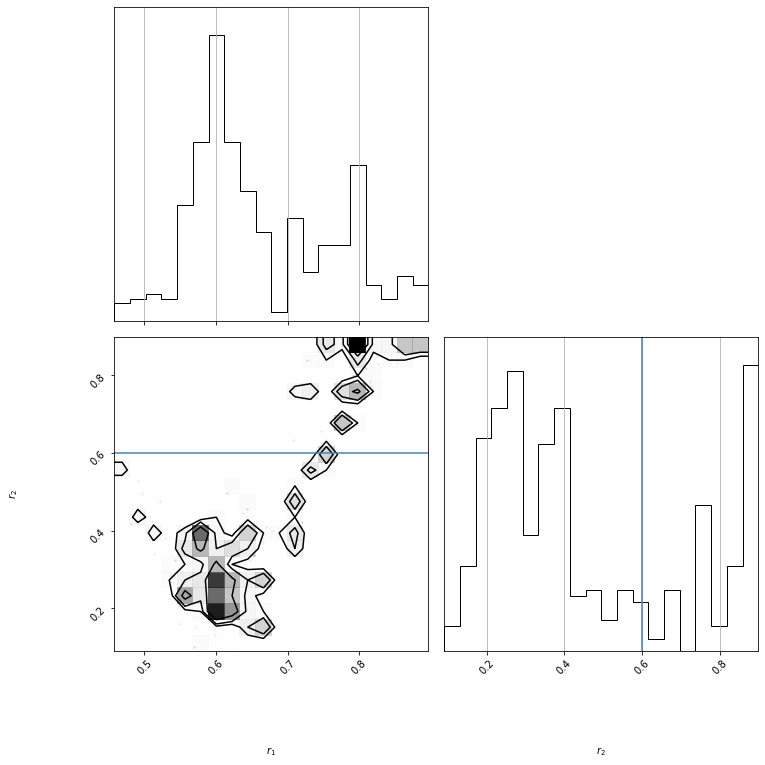

In [30]:
# Make a corner plot
fig = corner.corner(samples, labels=[r'$r_{1}$', r'$r_{2}$'], truths=[R1, R2])
fig.set_size_inches((12, 12))